In [1172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import xarray as xr
import torch

import sys
import os.path

sys.path.append(os.path.dirname(os.getcwd()))

from utils.train_test_utils import load_dataset, DatasetParameters


plt.rcParams['figure.figsize'] = (15, 7)


In [1173]:
run_dir = "../output/20220508_145611"
# run_dir = "../output/13_20220506_003511"

Text(0.5, 1.0, 'Test APV')

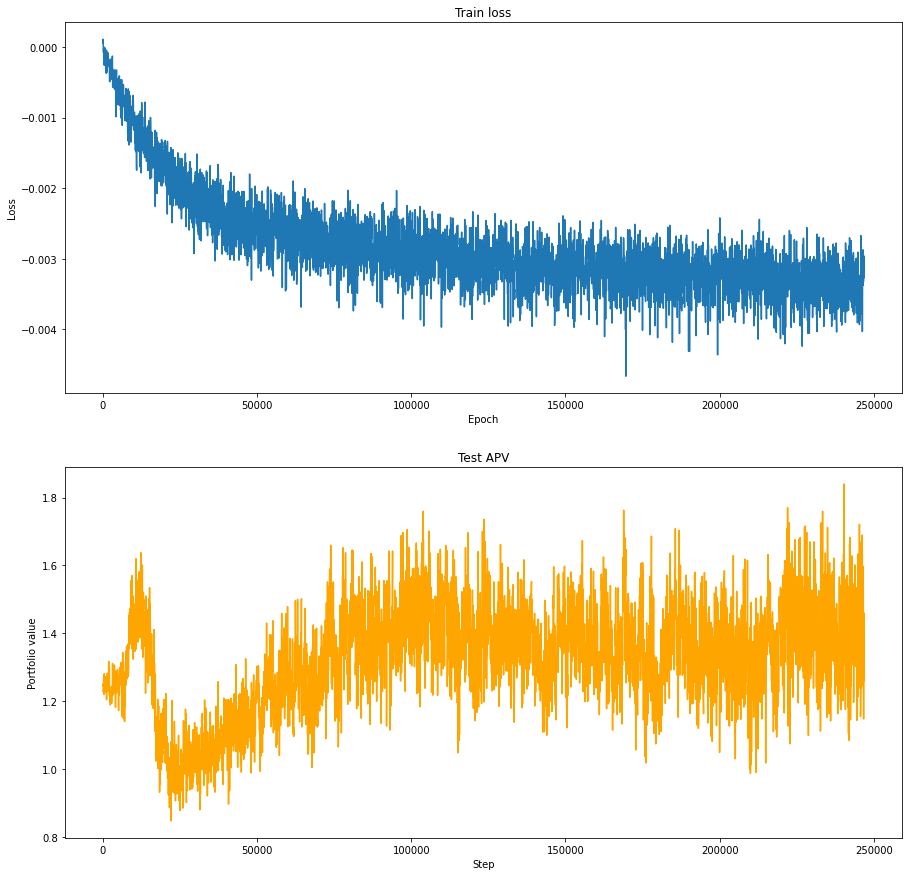

In [1174]:
dataset = xr.open_dataarray(f"../data/stocks_daily/stocks_big_dataset_2022-0425.nc")
train_df = pd.read_csv(f"{run_dir}/train_log.csv")
test_df = pd.read_csv(f"{run_dir}/test_results.csv", parse_dates=['Unnamed: 0']).rename({'Unnamed: 0': 'time'}, axis=1)

plt.figure(figsize=(15,15))
plt.subplot(211)
sns.lineplot(x='epoch', y='train_loss', data=train_df)
# sns.lineplot(x='epoch', y='test_loss', data=train_df)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title("Train loss")
# plt.legend(labels=["Train", "Test"])

plt.subplot(212)

# sns.lineplot(x='epoch', y='train_apv', data=train_df)
sns.lineplot(x='epoch', y='test_apv', data=train_df, color='orange')
plt.ylabel('Portfolio value')
plt.xlabel('Step')
plt.title("Test APV")
# plt.legend(labels=["Train", "Test"])

In [1175]:
best_epoch = train_df.iloc[np.argmax(train_df['test_apv'])]['epoch']

In [1117]:
best_epoch

98700

Text(0, 0.5, 'Part of portfolio')

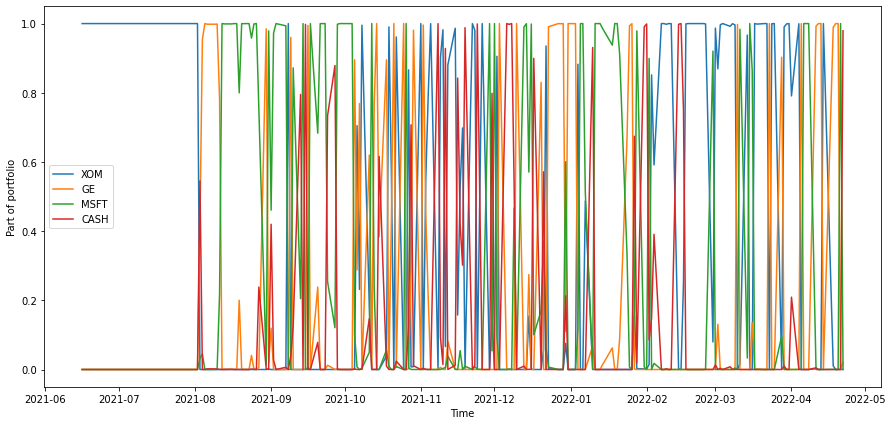

In [1118]:
assets = [re.sub(r"^asset_", "", col) for col in test_df.columns if col.startswith('asset_')]
assets = list(filter(lambda asset: asset != "cash", assets)) + ['cash']

for asset in assets:
    sns.lineplot(x='time', y=f'asset_{asset}', data=test_df)
    
plt.legend(labels=[asset.upper() for asset in assets])
plt.xlabel('Time')
plt.ylabel('Part of portfolio')
    

Text(0, 0.5, 'Price change')

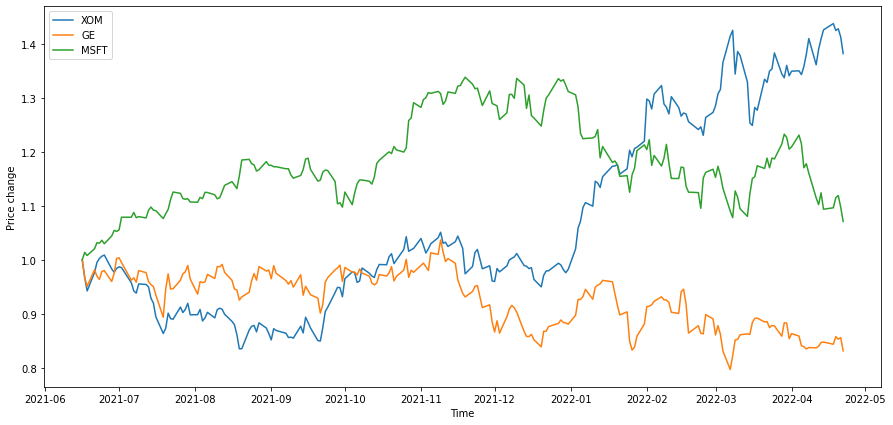

In [1108]:
for asset in assets:
    if asset == "cash":
        continue
    asset_data = dataset.sel(asset=asset.upper(), feature='close').to_series()
    asset_data = asset_data[asset_data.index >= test_df['time'][0]]

    sns.lineplot(data=asset_data/asset_data[0])
    
    
plt.legend(labels=[asset.upper() for asset in assets if asset != "cash"])
plt.xlabel('Time')
plt.ylabel('Price change')

Text(0, 0.5, 'Price change')

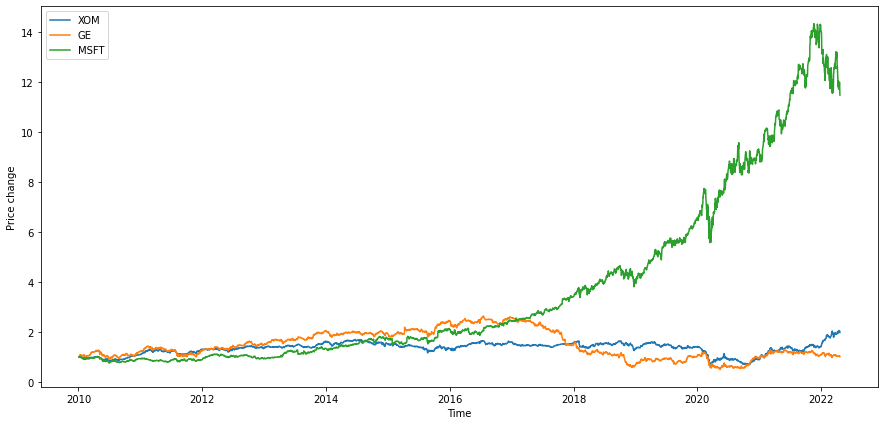

In [282]:
for asset in assets:
    if asset == "cash":
        continue
    asset_data = dataset.sel(asset=asset.upper(), feature='close').to_series()
    asset_data = asset_data[asset_data.index >= '2010']

    sns.lineplot(data=asset_data/asset_data[0])
    
    
plt.legend(labels=[asset.upper() for asset in assets if asset != "cash"])
plt.xlabel('Time')
plt.ylabel('Price change')

<AxesSubplot:xlabel='time', ylabel='Portfolio part'>

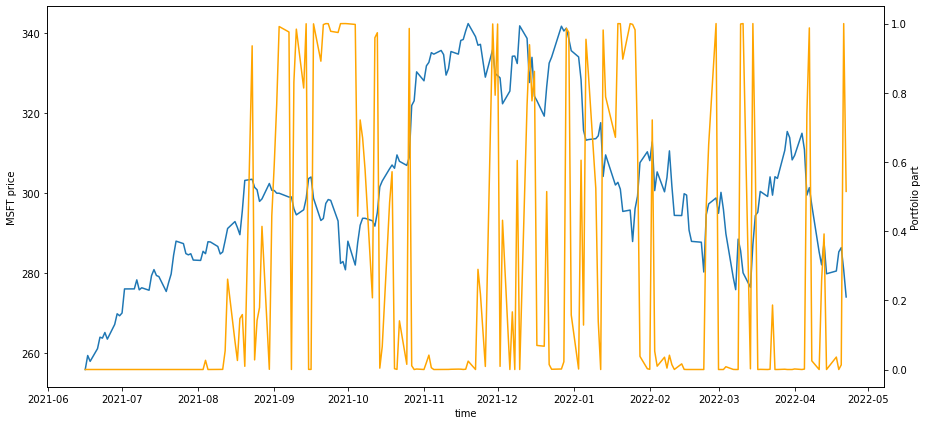

In [283]:
plt.figure(figsize=(15, 7))

asset = 'msft'

asset_data = dataset.sel(asset=asset.upper(), feature='close').to_series()
asset_data = asset_data[(asset_data.index >= test_df['time'][0]) & (asset_data.index <= test_df['time'].iloc[-1])]

ax = sns.lineplot(data=asset_data)
plt.ylabel(f'{asset.upper()} price')
ax2 = ax.twinx()
plt.ylabel(f'Portfolio part')


sns.lineplot(x='time', y=test_df[f'asset_{asset}'], data=test_df, ax=ax2, color='orange')


<AxesSubplot:xlabel='time', ylabel='Price change'>

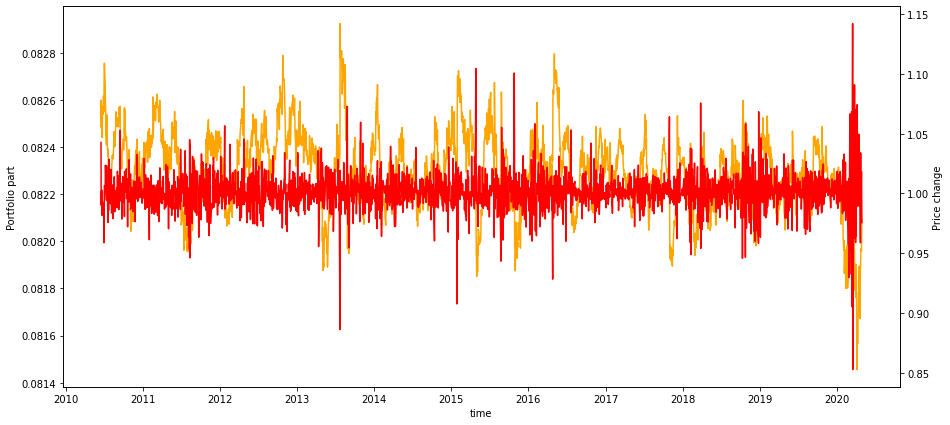

In [715]:
plt.figure(figsize=(15, 7))

ax = sns.lineplot(x='time', y=test_df[f'asset_{asset}'], data=test_df, color='orange')

plt.ylabel(f'Portfolio part')
ax2 = ax.twinx()
plt.ylabel(f'Price change')

sns.lineplot(x='time', y=test_df[f'price_change_{asset}'], data=test_df, ax=ax2, color='red')


In [716]:
# plt.figure(figsize=(15, 7))


# asset = 'spy'

# asset_data = dataset.sel(asset=asset.upper(), feature='close').to_series()
# asset_data = asset_data[asset_data.index >= test_df['time'][0]]
# # asset_data = asset_data[(asset_data.index >= test_df['time'][0]) & (asset_data.index < '2008-12-01')]


# plt.title('Our results vs S&P 500')
# sns.lineplot(x='time', y='portfolio_value', data=test_df, color='lime')
# sns.lineplot(data=asset_data/asset_data[0])


In [717]:
test_df.head()

,time,asset_cash,asset_xom,asset_ge,asset_msft,asset_c,asset_t,asset_bac,asset_pg,asset_wmt,...,price_change_msft,price_change_c,price_change_t,price_change_bac,price_change_pg,price_change_wmt,price_change_pfe,price_change_mo,price_change_aig,price_change_jnj
0,2010-06-16,0.011486,0.082291,0.082757,0.082487,0.082323,0.082207,0.082460,0.082186,0.082108,...,1.042655,1.028350,1.014700,1.025243,1.010776,1.007806,1.012394,1.017374,1.021300,1.012325
1,2010-06-17,0.011662,0.082278,0.082635,0.082599,0.082219,0.082190,0.082365,0.082218,0.082304,...,0.990125,1.000000,0.999217,1.004494,0.988370,0.987219,0.997423,0.995982,0.999736,1.001691
2,2010-06-18,0.011668,0.082268,0.082666,0.082478,0.082180,0.082149,0.082386,0.082261,0.082330,...,1.001900,0.992481,1.001959,0.996849,1.009315,1.008435,0.999354,1.008069,0.997359,0.998987
3,2010-06-21,0.011708,0.082272,0.082487,0.082476,0.082274,0.082139,0.082384,0.082302,0.082362,...,1.002655,1.012626,0.994525,1.000000,0.992552,1.002723,0.983193,1.001501,1.003707,1.000000
4,2010-06-22,0.011724,0.082251,0.082517,0.082440,0.082160,0.082212,0.082353,0.082338,0.082374,...,0.981468,1.002494,1.000393,0.998104,0.996737,0.989719,0.992768,1.001998,1.022422,0.999155


In [718]:
assets = ['XOM', 'GE', 'MSFT', 'C', 'T', 'BAC', 'PG', 'WMT', 'PFE', 'MO', 'AIG', 'JNJ']

dataset_params = DatasetParameters(
    dataset='../data/stocks_daily/stocks_big_dataset_2022-0425.nc',
    x_window_size=30,
    batch_size=128,
    dataset_date_range=slice('2006-06-01', None),
    dataset_features=['close', 'high', 'low', 'open'],
    dataset_assets=assets,
    train_range=('2010-06-29', '2020-05-01'),
    validation_range=('2020-05-01', '2021-05-01'),
#     test_range=(test_df['time'].iloc[0], test_df['time'].iloc[-1])
    test_range=('2021-05-03', '2022-04-22')
)

dm = load_dataset(dataset_params)

test_ds = dm.get_test_set_online(assets, dm._test_ind[0], dm._test_ind[-1], 30)

trivial_model_distribution = test_ds['y'][:, 0, :, :].squeeze()

# result = gains.prod(axis=0).mean()
# gain = result - 1

In [719]:
trivial_model_performance = np.cumprod(trivial_model_distribution, axis=0).mean(axis=1)
trivial_model_performance = np.concatenate([[1], trivial_model_performance])

In [720]:
asset_data = dataset.sel(asset=asset.upper(), feature='close').to_series()
asset_data = asset_data[(asset_data.index >= test_df['time'][0]) & (asset_data.index <= test_df['time'].iloc[-1])]

asset_data.shape

(2485,)

In [721]:
trivial_model_performance.shape

(13,)

In [722]:
test_df['time'][0]

Timestamp('2010-06-16 00:00:00')

In [723]:
asset_data.index[0]

Timestamp('2010-06-16 00:00:00')

In [724]:
test_df['time'][0]

Timestamp('2010-06-16 00:00:00')

In [725]:
test_df.head()

,time,asset_cash,asset_xom,asset_ge,asset_msft,asset_c,asset_t,asset_bac,asset_pg,asset_wmt,...,price_change_msft,price_change_c,price_change_t,price_change_bac,price_change_pg,price_change_wmt,price_change_pfe,price_change_mo,price_change_aig,price_change_jnj
0,2010-06-16,0.011486,0.082291,0.082757,0.082487,0.082323,0.082207,0.082460,0.082186,0.082108,...,1.042655,1.028350,1.014700,1.025243,1.010776,1.007806,1.012394,1.017374,1.021300,1.012325
1,2010-06-17,0.011662,0.082278,0.082635,0.082599,0.082219,0.082190,0.082365,0.082218,0.082304,...,0.990125,1.000000,0.999217,1.004494,0.988370,0.987219,0.997423,0.995982,0.999736,1.001691
2,2010-06-18,0.011668,0.082268,0.082666,0.082478,0.082180,0.082149,0.082386,0.082261,0.082330,...,1.001900,0.992481,1.001959,0.996849,1.009315,1.008435,0.999354,1.008069,0.997359,0.998987
3,2010-06-21,0.011708,0.082272,0.082487,0.082476,0.082274,0.082139,0.082384,0.082302,0.082362,...,1.002655,1.012626,0.994525,1.000000,0.992552,1.002723,0.983193,1.001501,1.003707,1.000000
4,2010-06-22,0.011724,0.082251,0.082517,0.082440,0.082160,0.082212,0.082353,0.082338,0.082374,...,0.981468,1.002494,1.000393,0.998104,0.996737,0.989719,0.992768,1.001998,1.022422,0.999155


ValueError: array length 12 does not match index length 2484

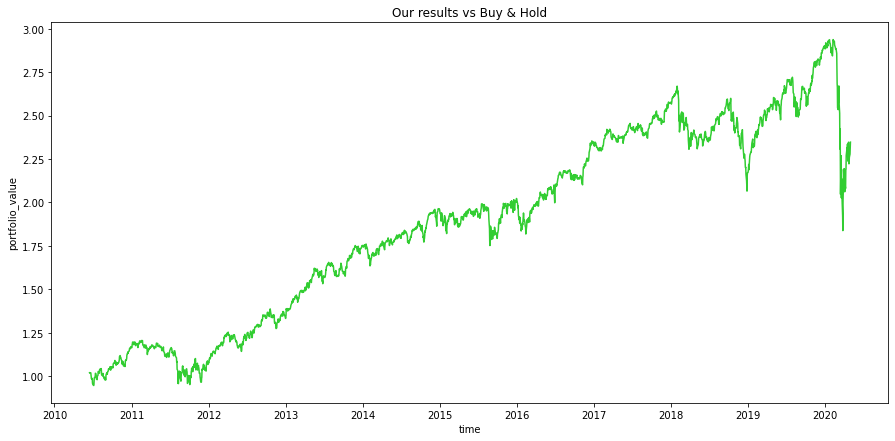

In [726]:
plt.figure(figsize=(15, 7))


asset = 'spy'

asset_data = dataset.sel(asset=asset.upper(), feature='close').to_series()
asset_data = asset_data[(asset_data.index >= test_df['time'][0]) & (asset_data.index <= test_df['time'].iloc[-1])]
# asset_data = asset_data[(asset_data.index >= test_df['time'][0]) & (asset_data.index < '2008-12-01')]

# our_model = np.concatenate([[1], test_df['portfolio_value']])

plt.title('Our results vs Buy & Hold')
sns.lineplot(x='time', y='portfolio_value', data=test_df, color='limegreen')

sns.lineplot(x=test_df['time'][:-1], y=trivial_model_performance[1:], color='cornflowerblue')

sns.lineplot(data=asset_data/asset_data[0], color='maroon')

plt.legend(labels=["Our model", "Buy & hold", "S&P 500"])